In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('extremist_profile_dataset.csv')

In [3]:
data.head()

,Statement,Label
0,Support for India's territorial integrity is u...,Non-Extremist
1,Pakistan has legitimate control over Kashmir.,Extremist
2,Support for India's territorial integrity is u...,Non-Extremist
3,India's actions in Kashmir are oppressive and ...,Extremist
4,Support for India's territorial integrity is u...,Non-Extremist


In [4]:
data['Label'] = data['Label'].map({'Extremist': 1, 'Non-Extremist': 0})

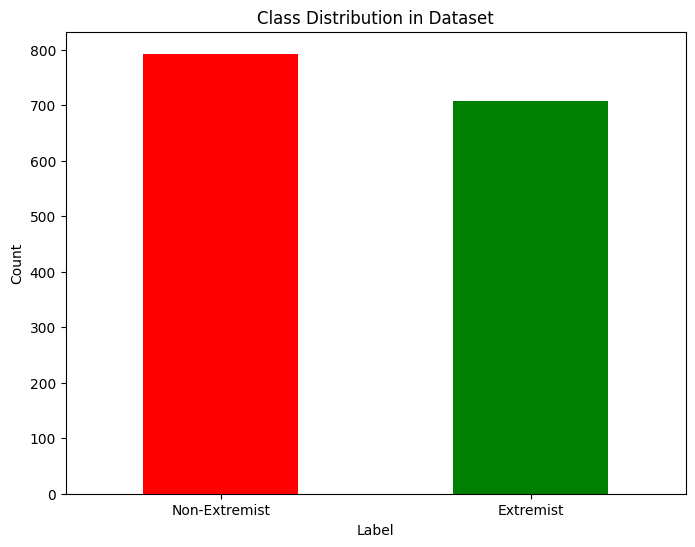

In [5]:
plt.figure(figsize=(8,6))
data['Label'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Class Distribution in Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Extremist', 'Extremist'], rotation=0)
plt.show()


In [6]:
X = data["Statement"]
y = data["Label"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = make_pipeline(CountVectorizer(), MultinomialNB())

In [9]:
model.fit(X_train, y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [10]:
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [11]:
def predict_extremism(statement):
    probabilities = model.predict_proba([statement])[0]  # Get probabilities
    labels = model.classes_  # Get class labels
    result = {str(labels[i]): round(float(probabilities[i]) * 100, 2) for i in range(len(labels))}
    return result

In [12]:
statement = "India must relinquish control over disputed territories."
print("Prediction (0-100%):", predict_extremism(statement))

Prediction (0-100%): {'0': 0.0, '1': 100.0}


In [15]:
while True:
    user_input = input("Enter a statement (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break
    result = predict_extremism(user_input)
    print("Prediction (0-100%):", result)

Prediction (0-100%): {'0': 47.08, '1': 52.92}
Prediction (0-100%): {'0': 47.08, '1': 52.92}
Prediction (0-100%): {'0': 81.16, '1': 18.84}
Prediction (0-100%): {'0': 99.57, '1': 0.43}
